# Преобразование Хафа
# 霍夫变换

Задача состоит в обнаружении геометрических примитивов на изображении.

1. Обнаружения линий на изображении с помощью преобразования Хафа.
2. Обнаружения окружностей на изображении с помощью преобразования Хафа.

任务是检测图像中的几何基元。 
1. 使用 Hough 变换检测图像中的线条。 
2. 使用 Hough 变换检测图像中的圆。


In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 1. Обнаружение линий
# 1. 线路检测

Рассмотрим применение реализации преобразования Хафа из OpenCV – функция cv2.HoughLines(), синтаксис которой:

考虑使用 OpenCV 的 Hough 变换实现 - 函数 cv2.HoughLines()，其语法为

lines = cv2.HoughLines(image, rho, theta, threshhold)

*   image: Image src
*   rho: Distance resolution of the accumulator (distance from the coordinate origin in the hough space)
*   theta: Angle resolution of the accumulator (Line rotation in radians)
*   threshold: Accumulator threshold parameter (Lines are only selected if they get votes equal to the threshold value)

* image： 图像源文件 
* rho： 累加器的距离分辨率（与霍夫空间坐标原点的距离） 
* theta： 累加器的角度分辨率（以弧度为单位的直线旋转） 
* threshold： 累加器阈值参数（只有票数等于阈值的线条才会被选中）

## Пример 1
Сначала рассмотрим очень простой вариант: на изображении присутствуют прямые горизонтальные и вертикальные линии, шум отсутствует.
## 示例 1 
首先让我们考虑一个非常简单的变例：图像中有水平和垂直的直线，并且没有噪点。

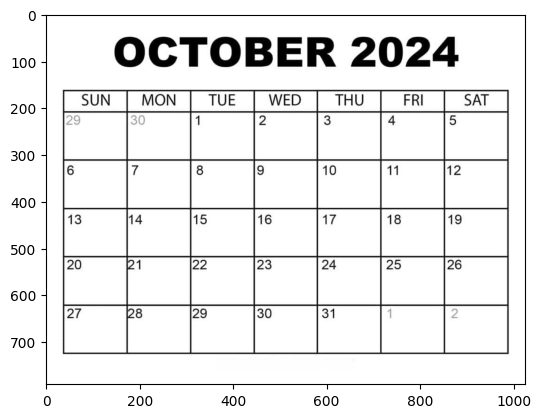

In [2]:
src = cv.imread("drive/MyDrive/cv_data/calendar-24-10.jpg")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
plt.imshow(src)

In [3]:
def drawLines(image, lines):
  if lines.shape[2] == 2 :
    for line in lines:
      rho, theta = line[0]
      a = np.cos(theta)
      b = np.sin(theta)
      x0 = a*rho
      y0 = b*rho
      x1 = int(x0+1000*(-b))
      y1 = int(y0+1000*(a))
      x2 = int(x0-1000*(-b))
      y2 = int(y0-1000*(a))
      cv.line(image,(x1,y1),(x2,y2),(255,0,0),2)
  else:
    for line in lines:
      x1,y1,x2,y2 = line[0]
      cv.line(image, (x1,y1), (x2,y2), (0,255,0), 2)

  plt.imshow(image)

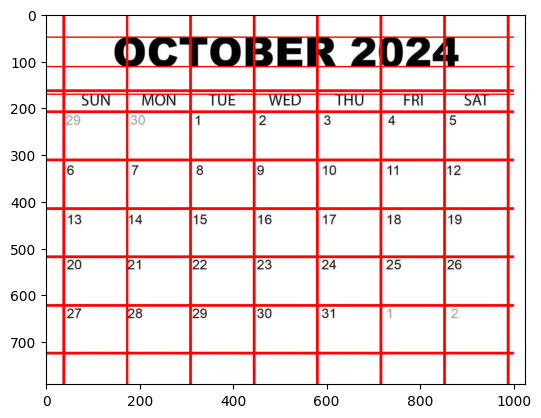

In [4]:
edges = cv.Canny(gray, 50, 150, apertureSize=3)
#plt.imshow(edges, 'gray')
lines = cv.HoughLines(edges, 1, np.pi/180, 200)
drawLines(src.copy(), lines)

В OpevCV реализовано также вероятностное преобразование Хафа (Probabilistic Hough Transform). Синтаксис функции:

OpevCV 还实现了概率 Hough 变换。 函数语法

lines = cv2.HoughLinesP(image, rho, theta, threshold, minLineLength, maxLineGap)

*   image: Image src rho: Distance resolution of the accumulator (distance from the coordinate origin in the hough space)
*   theta: Angle resolution of the accumulator (Line rotation in radians)
*   threshold: Accumulator threshold parameter (Lines are only selected if they get votes equal to the threshold value)
*   minLineLength: Line segments shorter than this value are rejected
*   maxLineGap: Max allowd gap between line segments to treat them as a single line
* image： 图像源代码 rho： 累加器的距离分辨率（与霍夫空间坐标原点的距离） 
* theta： 累加器的角度分辨率（线条旋转的弧度） 
* threshold： 累加器阈值参数（只有票数等于阈值的线条才会被选中） 
* minLineLength： 短于此值的线段将被拒绝
* maxLineGap：线段之间的最大允许间距，将它们视为一条线。

(32, 1, 4)


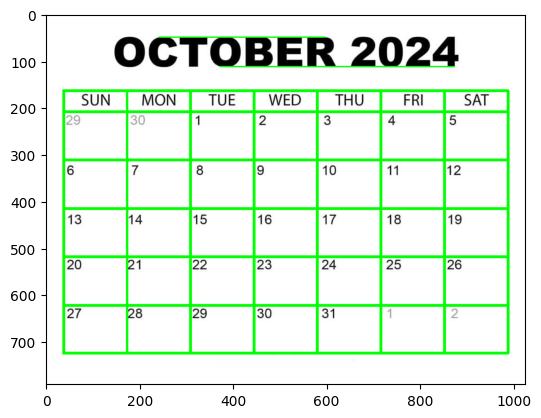

In [5]:
edges = cv.Canny(gray, 50, 150,apertureSize=3)
lines = cv.HoughLinesP(edges, 1, np.pi/180, 200, minLineLength=100, maxLineGap=40)
print(lines.shape)

drawLines(src.copy(), lines)

##Пример 2
Рассмотрим вариант сложнее – линии ярко выраженные, но изображение получено с камеры телефона, присутствуют шумы на изображении.

让我们考虑一个更复杂的变体--线条明显，但图像是从手机摄像头接收的，图像中有噪点。

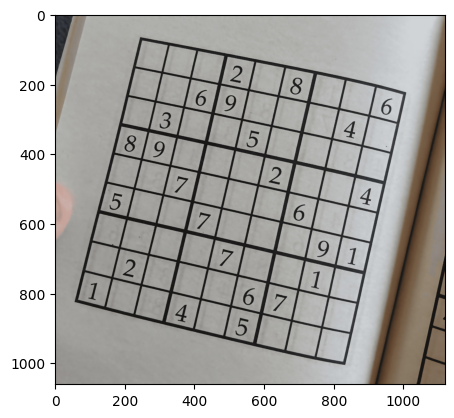

In [6]:
src = cv.imread("drive/MyDrive/cv_data/sudoku-1.jpg")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
src = cv.bilateralFilter(src, 9, 75, 75)
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
plt.imshow(src)

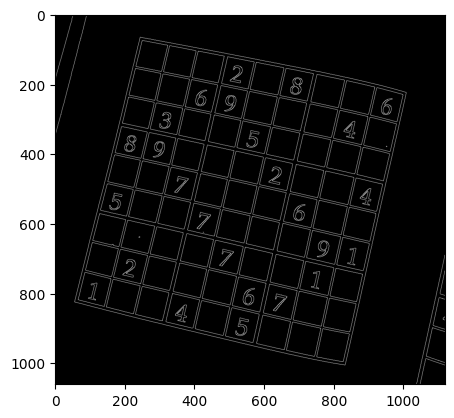

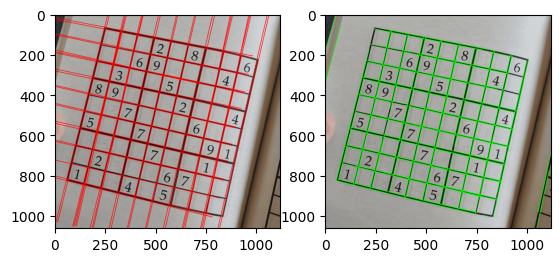

In [7]:
edges = cv.Canny(gray, 50, 200, apertureSize = 3)
plt.imshow(edges, 'gray')
lines = cv.HoughLines(edges, 1, np.pi/180, 200)

fig, axs = plt.subplots(1,2)
plt.axes(axs[0])
drawLines(src.copy(), lines)

lines = cv.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=10, maxLineGap=40)
plt.axes(axs[1])
drawLines(src.copy(), lines)


##Пример 3
Обнаружение разметки на дороге.

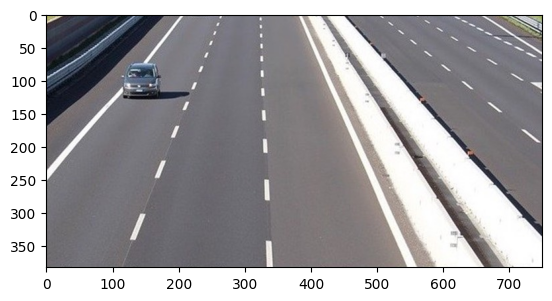

In [8]:
src = cv.imread("drive/MyDrive/cv_data/road.jpg")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
plt.imshow(src)

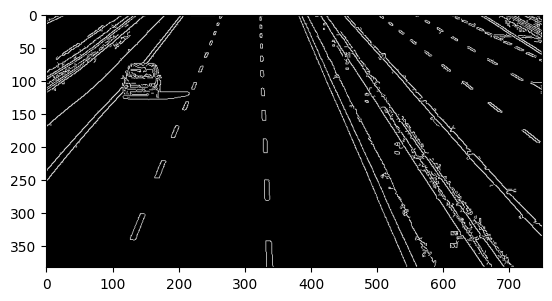

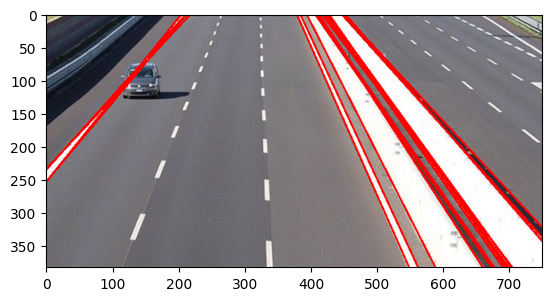

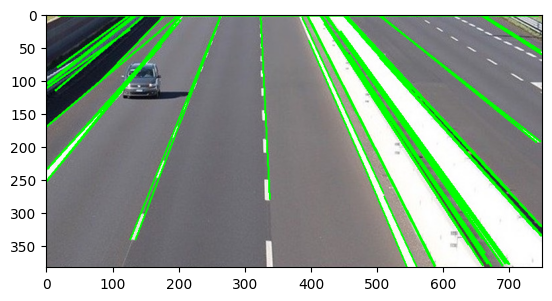

In [9]:
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)

edges = cv.Canny(gray, 50, 200, apertureSize = 3)
plt.imshow(edges, 'gray')

lines = cv.HoughLines(edges, 1, np.pi/180, 150)
plt.figure()
drawLines(src.copy(), lines)

lines = cv.HoughLinesP(edges, 1, np.pi/180, 80, minLineLength=10, maxLineGap=350)
plt.figure()
drawLines(src.copy(), lines)

#2. Обнаружение окружностей

#2. 检测圆圈

Для обнаружения окружностей с помощью преобразования Хафа в OpenCV реализована функция cv2.Houghcircles(), синтаксис которой:

要使用 Hough 变换检测圆，OpenCV 实现了 cv2.Houghcircles() 函数，其语法为

circles = cv.HoughCircles( image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]])

*   **circles**: Output vector of found circles. Each vector is encoded as 3 or 4 element floating-point vector (x,y,radius) or (x,y,radius,votes) .\
找到的圆的输出向量。 每个向量编码为 3 或 4 元素浮点型向量 (x,y,radius) 或 (x,y,radius,votes) \
*   **image**: 8-bit, single-channel, grayscale input image.\
8 位、单通道、灰度输入图像。\
*   **method**: Detection method, see HoughModes. The available methods are HOUGH_GRADIENT and HOUGH_GRADIENT_ALT.\
检测方法，请参见 HoughModes。 可用的方法有 HOUGH_GRADIENT 和 HOUGH_GRADIENT_ALT.\
*   **dp**: Inverse ratio of the accumulator resolution to the image resolution. For example, if dp=1 , the accumulator has the same resolution as the input image. If dp=2 , the accumulator has half as big width and height. For HOUGH_GRADIENT_ALT the recommended value is dp=1.5, unless some small very circles need to be detected.\
累加器分辨率与图像分辨率的反比。 例如，如果 dp=1 ，累加器的分辨率与输入图像的分辨率相同。 如果 dp=2 ，累加器的宽度和高度将减半。 对于 HOUGH_GRADIENT_ALT，建议使用 dp=1.5，除非需要检测一些非常小的圆。\
*   **minDist**: Minimum distance between the centers of the detected circles. If the parameter is too small, multiple neighbor circles may be falsely detected in addition to a true one. If it is too large, some circles may be missed.\
检测到的圆心之间的最小距离。 如果参数太小，除了一个真实的圆之外，还可能错误地检测到多个相邻的圆。 如果参数过大，可能会漏掉一些圆。\
*   **param1**: First method-specific parameter. In case of HOUGH_GRADIENT and HOUGH_GRADIENT_ALT, it is the higher threshold of the two passed to the Canny edge detector (the lower one is twice smaller). Note that HOUGH_GRADIENT_ALT uses Scharr algorithm to compute image derivatives, so the threshold value shough normally be higher, such as 300 or normally exposed and contrasty images.\
第一个方法特定参数。 对于 HOUGH_GRADIENT 和 HOUGH_GRADIENT_ALT，它是传递给 Canny 边缘检测器的两个阈值中较高的一个（较低的阈值要小两倍）。 请注意，HOUGH_GRADIENT_ALT 使用 Scharr 算法计算图像导数，因此阈值通常会更高，例如 300 或正常曝光和对比度较高的图像。\
*   **param2**: Second method-specific parameter. In case of HOUGH_GRADIENT, it is the accumulator threshold for the circle centers at the detection stage. The smaller it is, the more false circles may be detected. Circles, corresponding to the larger accumulator values, will be returned first. In the case of HOUGH_GRADIENT_ALT algorithm, this is the circle "perfectness" measure. The closer it to 1, the better shaped circles algorithm selects. In most cases 0.9 should be fine. If you want get better detection of small circles, you may decrease it to 0.85, 0.8 or even less. But then also try to limit the search range [minRadius, maxRadius] to avoid many false circles.\
第二个方法特定参数。 对于 HOUGH_GRADIENT，它是检测阶段圆心的累加阈值。 阈值越小，检测到的虚假圆就越多。 与较大累加器值相对应的圆将首先返回。 在 HOUGH_GRADIENT_ALT 算法中，这是衡量圆 "完美度 "的指标。 它越接近 1，算法选择的圆形状就越好。 大多数情况下，0.9 应该没问题。 如果希望更好地检测小圆，可以将其减小到 0.85、0.8 或更小。 但也要尽量限制搜索范围 [minRadius, maxRadius] 以避免出现很多错误的圆。\
*   **minRadius**: Minimum circle radius.\
最小圆半径\
*   **maxRadius**: Maximum circle radius. If <= 0, uses the maximum image dimension. If < 0, HOUGH_GRADIENT returns centers without finding the radius. HOUGH_GRADIENT_ALT always computes circle radiuses.\
最大圆半径。 如果 <= 0，则使用最大图像尺寸。 如果 <0，HOUGH_GRADIENT 返回圆心，而不计算半径。 HOUGH_GRADIENT_ALT 总是计算圆半径。\


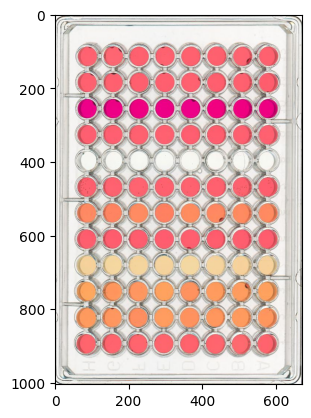

In [10]:
src = cv.imread("drive/MyDrive/cv_data/wellplate-2.jpg")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
plt.imshow(src)

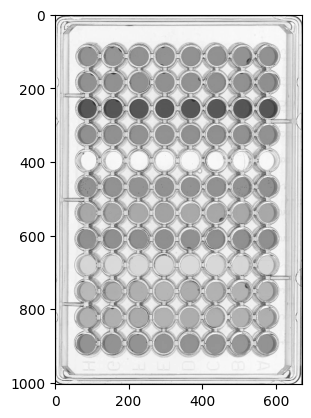

In [11]:
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
#gray = cv.blur(gray, (3, 3)) # Apply blur with a 3x3 kernel
plt.imshow(gray, 'gray')

In [12]:
detected_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT,
                   1,  # Inverse ratio of the accumulator resolution to the image resolution
                   15, # Minimum distance between the centers of the detected circles
                   param1 = 100, # The higher threshold of the two passed to the Canny edge detector
                   param2 = 40,  # The accumulator threshold for the circle centers at the detection stage
                   minRadius = 0, maxRadius = 30)

Total pipes:  93


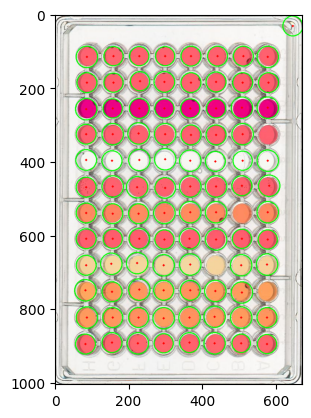

In [13]:
image = src.copy()
pipes_count = 0
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles)) # Convert circle metadata to integers

    for points in detected_circles[0, :]:
        a, b, r = points[0], points[1], points[2]

        cv.circle(image, (a, b), r, (0, 255, 0), 2)

        # Draw a small circle (of radius 1) to show the center.
        cv.circle(image, (a, b), 1, (255, 0, 0), 3)

        pipes_count += 1

print("Total pipes: ", pipes_count)
plt.imshow(image)
